### Student Information
Name: 何若彤

Student ID: 112096029

GitHub ID: Althea80

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### 1.Test code for environment setup

In [12]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.utils import Bunch
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version)


/Users/hello/Desktop/資料探勘/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (main, Oct  4 2025, 16:38:25) [Clang 17.0.0 (clang-1700.0.13.5)]


### 2. Data Preparation

In order to get faster execution times (similar to working with 4 categories 
out of the 20 available in the newsgroups dataset), we can select specific 
sentiment categories out of the 3 available:

Available categories:
  - 'positive' (label: 1.0)
  - 'neutral'  (label: 0.0)
  - 'negative' (label: -1.0)

In [13]:
df_raw = pd.read_csv('~/Desktop/資料探勘/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv')
df_raw['category_name'] = df_raw['sentiment'].map({
    1.0: 'positive',
    0.0: 'neutral',
    -1.0: 'negative'
})
categories = ['positive', 'neutral', 'negative']

In [14]:
def fetch_reddit_sentiment(df_raw,
                           subset='train',
                           categories=None,
                           shuffle=True,
                           random_state=42):
    
    if categories is None:
        categories = ['positive', 'neutral', 'negative']
    
    df_filtered = df_raw[df_raw['category_name'].isin(categories)].copy()
    
    if shuffle:
        df_filtered = df_filtered.sample(frac=1, random_state=random_state)
    
    df_filtered = df_filtered.reset_index(drop=True)
    
    category_to_idx = {cat: idx for idx, cat in enumerate(categories)}
    target = df_filtered['category_name'].map(category_to_idx).values
    
    bunch = Bunch(
        data=df_filtered['text'].tolist(),
        target=target,
        target_names=categories,
        filenames=[f"reddit_{row['post_id']}.txt" for _, row in df_filtered.iterrows()],
        metadata=df_filtered[['type', 'datetime', 'post_id', 'subreddit', 'title', 
                              'author', 'upvotes', 'downvotes', 'upvote_ratio',
                              'subjectivity', 'polarity']].to_dict('records'),
        DESCR=f'Reddit Stock Sentiment Dataset\nCategories: {categories}\nTotal samples: {len(df_filtered)}'
    )
    return bunch

In [15]:
twenty_train = fetch_reddit_sentiment(
    df_raw,
    subset='train',
    categories=categories,
    shuffle=True,
    random_state=42
)

### >>> Exercise 1 
I built a similar dictionary structure to replicate the original lab's functionality.
Since we're working with a CSV file instead of sklearn's built-in dataset,
I generate all the attributes (data, target, target_names, etc.) separately
to create a Bunch object that mimics fetch_20newsgroups().

In [16]:
for i in range(3):
    meta = twenty_train.metadata[i]
    category = twenty_train.target_names[twenty_train.target[i]]
    
    print(f'Example {i+1}')
    print(f"From: r/{meta['subreddit']} by u/{meta['author']}")
    print(f"Subject: {meta['title']}")
    print(f"Date: {meta['datetime']}")
    print(f"Post-ID: {meta['post_id']}")
    print(f"Type: {meta['type']}")
    print(f"Upvotes: {meta['upvotes']} | Downvotes: {meta['downvotes']} | Ratio: {meta['upvote_ratio']}")
    print(f"Sentiment: {category}")
    print(f"Polarity: {meta['polarity']:.3f} | Subjectivity: {meta['subjectivity']:.3f}")
    print()
    print("\n".join(twenty_train.data[i].split("\n")))
    print("=" * 80)
    print()

Example 1
From: r/StockMarket by u/IamNotaMonkeyRobot
Subject: Trump: We Are Doing Really Well On Our Tariff Policy.
Date: 2025-04-11 15:42:58
Post-ID: mmkwda9
Type: comment
Upvotes: 1 | Downvotes: nan | Ratio: nan
Sentiment: neutral
Polarity: 0.000 | Subjectivity: 0.000

"We" who?

Example 2
From: r/wallstreetbets by u/iPlayedHockeInHS
Subject: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Date: 2025-04-12 3:04:05
Post-ID: mmob98a
Type: comment
Upvotes: 1 | Downvotes: nan | Ratio: nan
Sentiment: negative
Polarity: -0.600 | Subjectivity: 0.950

Chicken jockey

Example 3
From: r/StockMarket by u/Narradisall
Subject: How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Date: 2025-04-10 14:40:26
Post-ID: mme8wxn
Type: comment
Upvotes: 2 | Downvotes: nan | Ratio: nan
Sentiment: positive
Polarity: 0.800 | Subjectivity: 0.750

Not great Bob



### 3. Data Transformation

In [17]:
import pandas as pd

import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes.

In [18]:
print(X.query('category_name == "positive"')[["text","category_name"]])
print(X[X['text'].str.contains('money', case=False, na=False)])

                                                  text category_name
2                                        Not great Bob      positive
3    Speak for yourself, my wife is being harder on...      positive
6                          200k loss in a month.. haha      positive
7    High risk high beta portfolio but it's 50% uni...      positive
11   Other countries probably will go through a rec...      positive
..                                                 ...           ...
833  You need to stop listening to the noise and th...      positive
834  That was a masterfully executed bull trap. Let...      positive
835  Hey guys! Currently on vacation which has been...      positive
842                                   My first thought      positive
846  My personal favorite part of the graph is that...      positive

[319 rows x 2 columns]
                                                  text  category category_name
10   Go with the flow if you wanna make money..for ...         2     

In [19]:
X.iloc[:10, 0]

0                                            "We" who?
1                                       Chicken jockey
2                                        Not great Bob
3    Speak for yourself, my wife is being harder on...
4                               Where can I read this?
5                         That's a chart since April 6
6                          200k loss in a month.. haha
7    High risk high beta portfolio but it's 50% uni...
8                                                FELON
9    That’s an 11% drop, even with the delusional s...
Name: text, dtype: object

In [20]:
X[X.index.isin([2, 4, 6])]

,text,category,category_name
2,Not great Bob,0,positive
4,Where can I read this?,1,neutral
6,200k loss in a month.. haha,0,positive


### **>>> Exercise 3 :**  
Try to fetch records belonging to the ```positive``` category, and query every 10th record. Only show the first 5 records.

In [21]:
X[X["category_name"]=="positive"][:10][0:5]

,text,category,category_name
2,Not great Bob,0,positive
3,"Speak for yourself, my wife is being harder on...",0,positive
6,200k loss in a month.. haha,0,positive
7,High risk high beta portfolio but it's 50% uni...,0,positive
11,Other countries probably will go through a rec...,0,positive


### 4. Data Mining using Pandas

### >>> Exercise 4 : 
I have calculated the missing values in every record instead of every column.  

In [22]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [23]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [24]:
dummy_series

text        dummy_record
category               1
dtype: object

In [25]:
dummy_series.to_frame().T

,text,category
0,dummy_record,1


In [26]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [27]:
# check if the records was commited into result
len(result_with_series)

848

In [28]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [29]:
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [30]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [31]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### 4.2 Dealing with Duplicate Data

In [32]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [33]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
X.drop_duplicates(keep=False, inplace=True)

## 5.  Data Preprocessing

### 5.1 Sampling

In [34]:
X_sample = X.sample(n=100)
X_sample[0:4]

,text,category,category_name
192,What are you buying calls on?,1,neutral
794,awesome,0,positive
25,"ChatGPT model is not build on 2025 data, so, n...",1,neutral
5,That's a chart since April 6,1,neutral


### >>> Exercise 7 :
The bar chart shows the distribution of sentiment categories in the sample dataset(n=100). 
The three categories (positive, neutral, and negative) are relatively balanced, 
with positive sentiment having slightly more samples (approximately 36), 
followed by neutral (approximately 33) and negative (approximately 31).

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

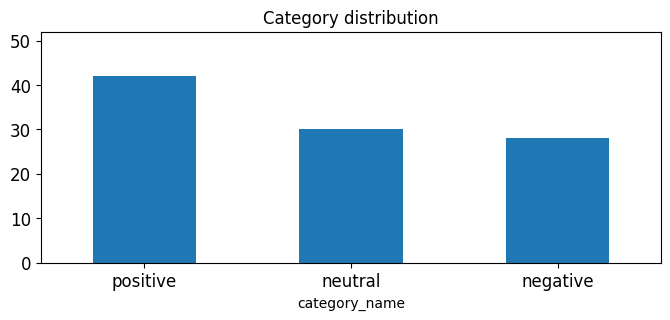

In [35]:
# Answer here
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max()+10], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> Exercise 8 :
In the side-by-side comparison of the distribution between the two datasets shows that there still difference between the distribution of full dataset and sample dataset.

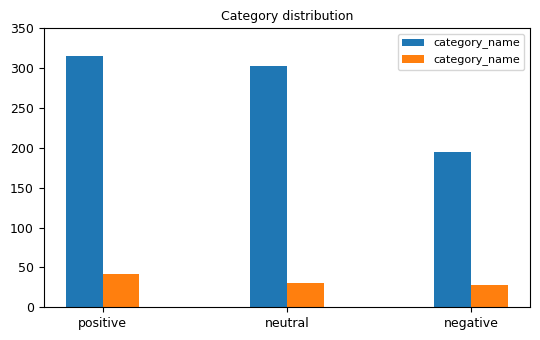

In [36]:
x_counts = X.category_name.value_counts()
x_sample_counts = X_sample.category_name.value_counts()
categories = sorted(set(x_counts.index).union(set(x_sample_counts.index)),reverse=True)
x_counts = x_counts.reindex(categories, fill_value=0)
x_sample_counts = x_sample_counts.reindex(categories, fill_value=0)
bar_width = 0.2
x1 = np.arange(len(categories)) 
x2 = [x + bar_width for x in x1] 
plt.figure(figsize=(5.5, 3.5))
plt.bar(x1, x_counts, bar_width, label='category_name')
plt.bar(x2, x_sample_counts, bar_width, label='category_name')
plt.title('Category distribution',fontsize = 9)
plt.ylim([0, 350])
plt.xticks(x1 + bar_width/2, categories,fontsize = 9)
plt.yticks(fontsize=9)
plt.legend(fontsize = 8)
plt.tight_layout()
plt.show()

### 5.2 Feature Creation

In [37]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
list(X[0:1]['unigrams'])

[nltk_data] Downloading package punkt to /Users/hello/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/hello/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[['``', 'We', "''", 'who', '?']]

### 5.3 Feature subset selection

In [38]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) 
analyze = count_vect.build_analyzer()

### >>> Exercise 9
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [39]:
analyze(X.text[0])

['we', 'who']

In [40]:
X_counts.shape

(813, 4313)

In [41]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [42]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [43]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### >>> Exercise 10 :
The code uses sparse matrix operations (.nonzero()) to efficiently find 
non-zero indices, then filters for count = 1. Results show four 
single-occurrence terms: 'where' (index 4196), 'can' (694), 'read' (3086), 
and 'this' (3835).

In [44]:
record_index = 4

non_zero_indices = X_counts[record_index].nonzero()[1]
feature_names = count_vect.get_feature_names_out()

for idx in non_zero_indices:
    if X_counts[record_index, idx] == 1:
        print(f"{idx}: '{feature_names[idx]}'")

4196: 'where'
694: 'can'
3086: 'read'
3835: 'this'


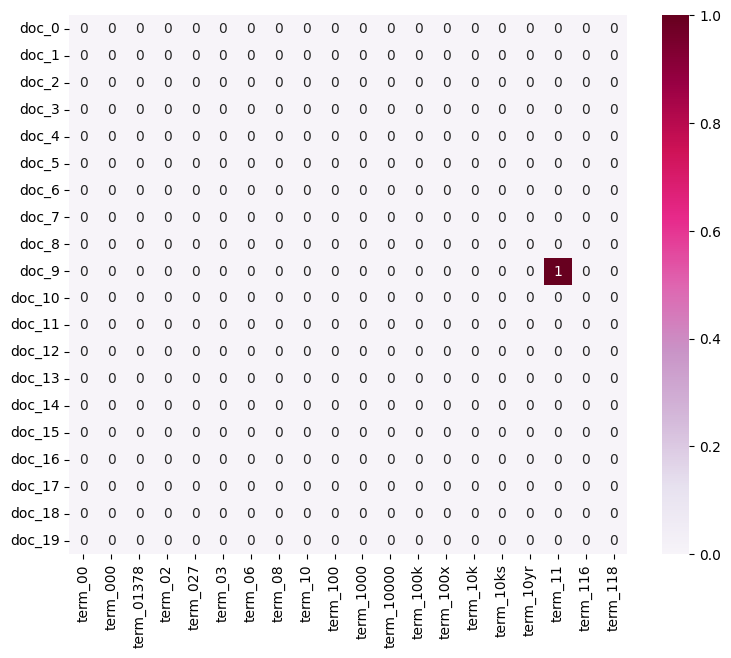

In [45]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True) 

### 5.4 Attribute Transformation / Aggregation

###  5.4.1 Transform Text Data

In [46]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> Exercise 12
interactive visualization of subplots

In [47]:
import plotly.graph_objects as plotly
fig = plotly.Figure(data=[
    plotly.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
])
fig.update_layout(
    title='Term Frequencies: First 300 Terms',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis_tickangle=-90,  
    height=600,
    template='plotly_white')
fig.show()

### >>> Exercise 13
I reduced the number of terms by using stratified sample with Terms from Each Frequency Quartile.

In [48]:
q1, q2, q3 = np.percentile(term_frequencies, [25, 50, 75])


sample_terms = []
sample_freqs = []
sample_labels = []

quartiles = [
    (0, q1, 'Q1: Low Freq'),
    (q1, q2, 'Q2: Medium-Low Freq'),
    (q2, q3, 'Q3: Medium-High Freq'),
    (q3, np.inf, 'Q4: High Freq')
]

for lower, upper, label in quartiles:
    mask = (term_frequencies >= lower) & (term_frequencies < upper)
    candidates_idx = np.where(mask)[0]
    
    if len(candidates_idx) > 0:
        n_sample = min(5, len(candidates_idx))
        sampled_idx = np.random.choice(candidates_idx, n_sample, replace=False)
        sample_terms.extend(feature_names[sampled_idx])
        sample_freqs.extend(term_frequencies[sampled_idx])
        sample_labels.extend([label] * n_sample)
fig = plotly.Figure()
for quartile_label in ['Q1: Low Freq', 'Q2: Medium-Low Freq', 
                       'Q3: Medium-High Freq', 'Q4: High Freq']:
    mask = [label == quartile_label for label in sample_labels]
    q_terms = [term for term, m in zip(sample_terms, mask) if m]
    q_freqs = [freq for freq, m in zip(sample_freqs, mask) if m]

    fig.add_trace(plotly.Bar(
        x=q_freqs,          
        y=q_terms,           
        name=quartile_label,
        orientation='h',
        hovertemplate='<b>%{y}</b><br>Frequency: %{x:,}<extra></extra>'
    ))

fig.update_layout(
    title='Stratified Sample: Terms from Each Frequency Quartile',
    xaxis_title='Frequency',
    yaxis_title='Terms',
    height=800,
    barmode='overlay',
    template='plotly_white'
)

fig.show()

### >>> Exercise 14 :
Due to the number of dataset, I only chose 100 terms as sample to drow the long tail and found that the prep. or beV were most used in the data.

In [49]:
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_terms = feature_names[sorted_indices]
sorted_freqs = term_frequencies[sorted_indices]

fig = plotly.Figure(data=[
    plotly.Bar(
        x=list(range(100)), 
        y=sorted_freqs[:100],
        text=sorted_terms[:100],
        hovertemplate='<b>Rank %{x}</b><br>%{text}<br>Frequency: %{y:,}<extra></extra>'
    )
])

fig.update_layout(
    title='Long Tail Distribution',
    xaxis_title='Term Rank (1 = Most Frequent)',
    yaxis_title='Frequency'
)

fig.show()

### >>> Exercise 15 :
I use'term_frequencies_log' with sample=100 to view the gap between different frenquency of terms clearly.

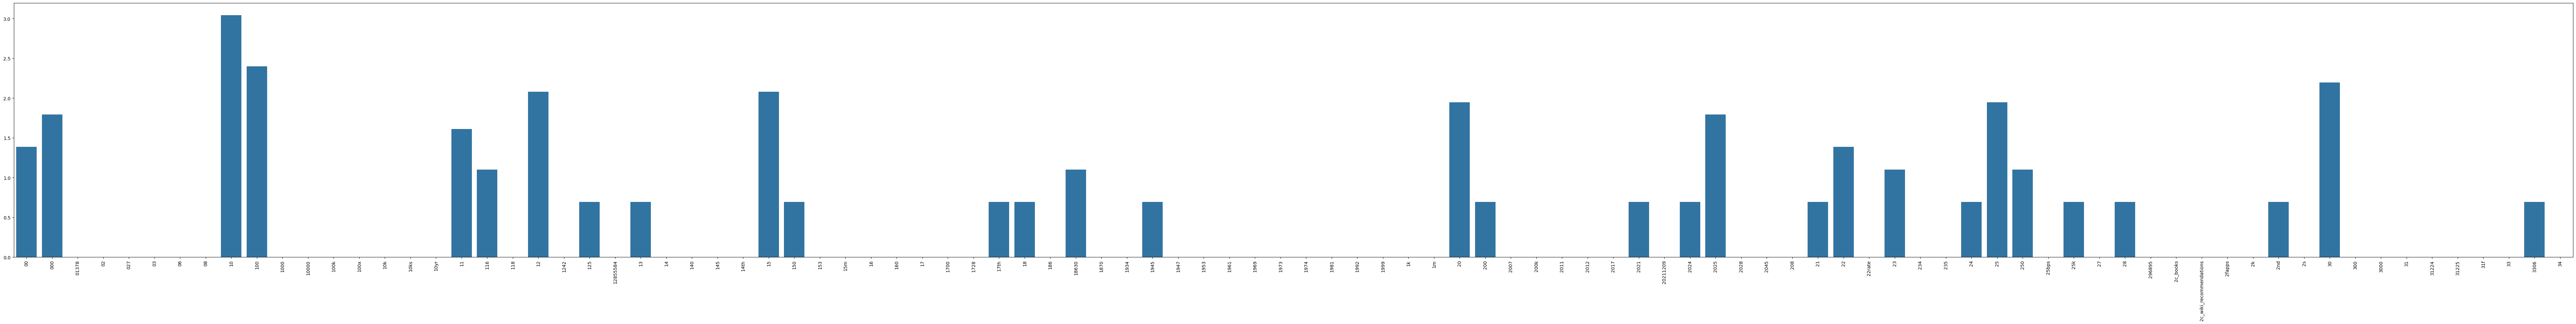

In [50]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100],
                y=term_frequencies_log[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

I chose horizontal bar charts to visualize the top 10 most frequent words in each sentiment category. Using CountVectorizer, I extracted word frequencies after removing stop words and common uninformative terms to reveal real differences between sentiments. The visualization shows distinct vocabulary patterns: positive sentiment features "china," "good," and "company" (suggesting business optimism), negative sentiment includes "tariffs" and "bad" (indicating political/economic frustration), while neutral sentiment contains technical terms like "emote" and "img." I kept cross-category words like "trump" and "china" as they provide valuable context about central discussion topics that generate varying emotional responses.

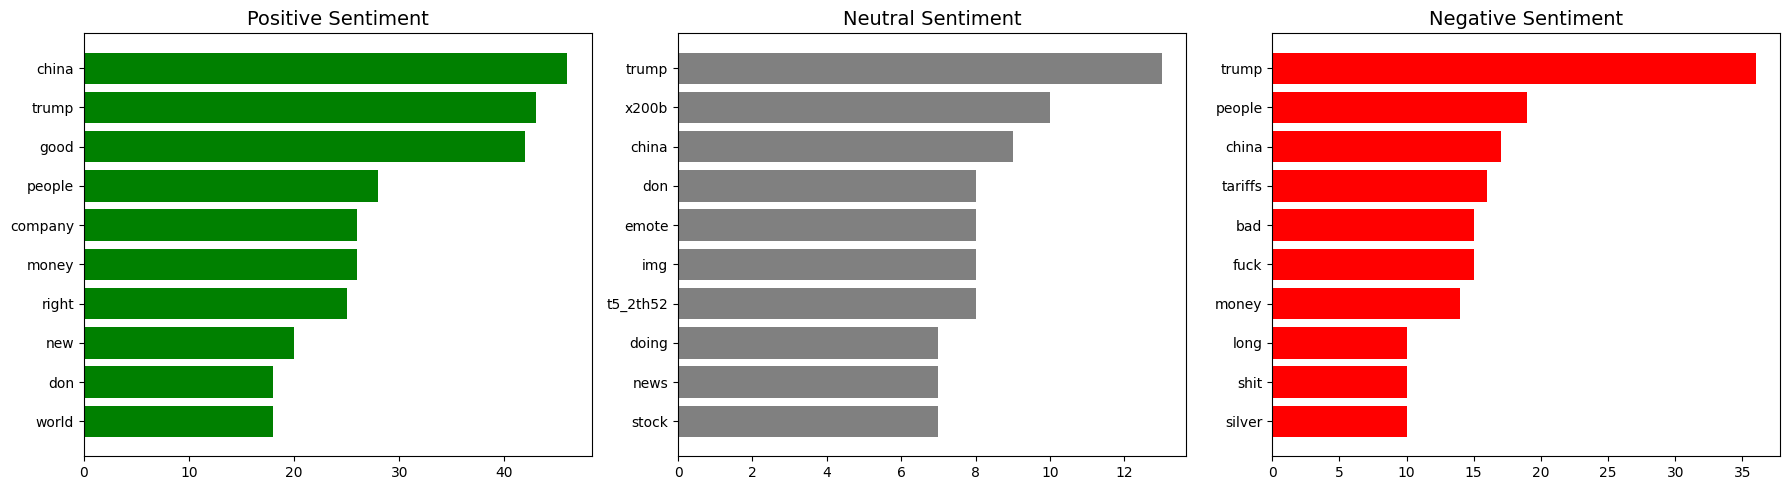

In [51]:
categories = ['positive', 'neutral', 'negative']
colors = ['green', 'grey', 'red']

count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X['text'])
feature_names = count_vect.get_feature_names_out()

exclude_words = {'like', 'just', 'going','think','make','time','day','com','market','want'}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (cat, col) in enumerate(zip(categories, colors)):
    mask = X['category_name'] == cat
    indices = np.where(mask)[0]
    X_sent = X_counts[indices]
    freqs = np.asarray(X_sent.sum(axis=0))[0]
    freq_dict = dict(zip(feature_names, freqs))
    freq_dict = {w: c for w, c in freq_dict.items() if w not in exclude_words}
    top = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    words, counts = zip(*top)
    
    axes[idx].barh(words[::-1], counts[::-1], color=col)
    axes[idx].set_title(f'{cat.capitalize()} Sentiment', fontsize=14)

plt.tight_layout()
plt.show()

# Phase 2

###  5.4.2 Finding frequent patterns

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

category_dfs = {}  

for category in categories:
    category_dfs[category] = X[X['category_name'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()  
    X_counts = count_vect.fit_transform(df['text'])
    words = count_vect.get_feature_names_out()
   
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

filt_term_document_dfs = {}  
for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

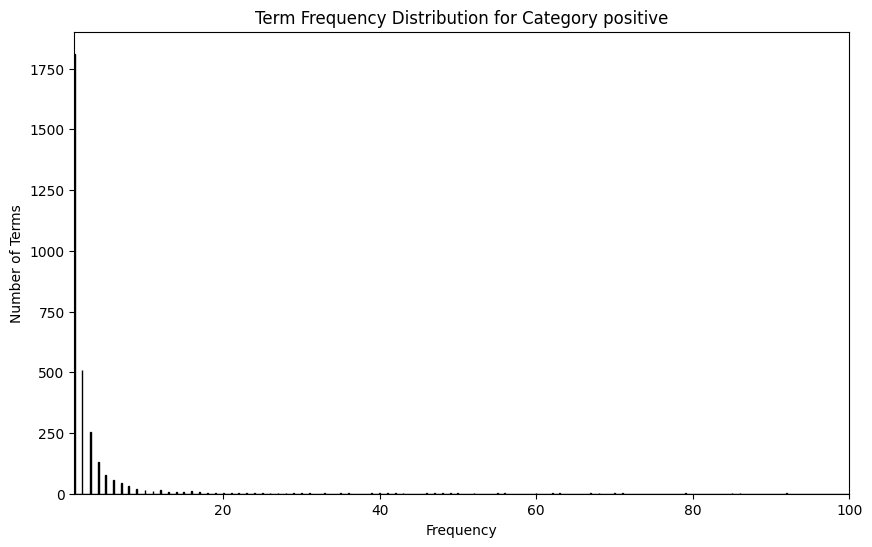

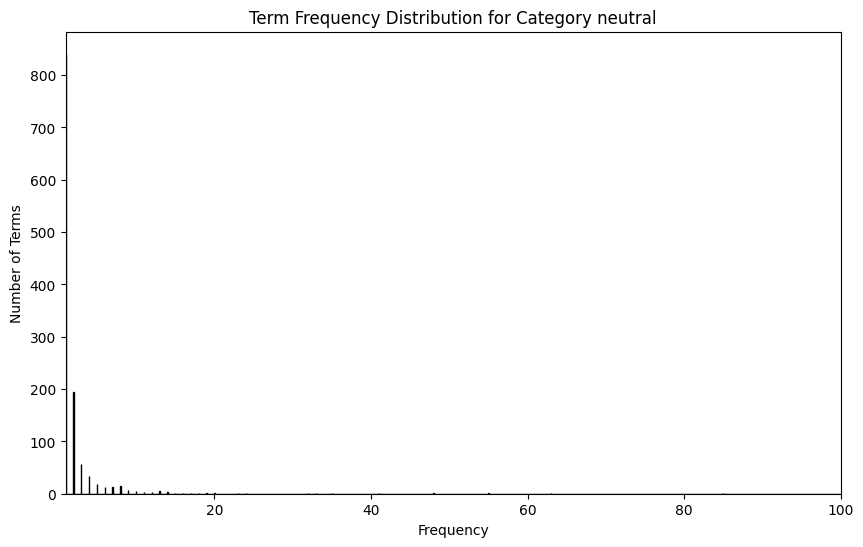

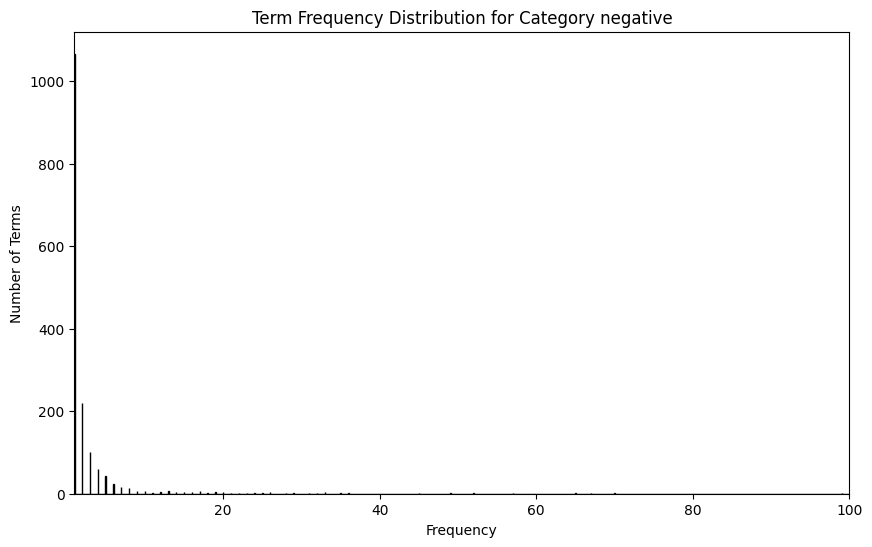

In [53]:
for category_number in range(3):
    word_counts =filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
    
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
    plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')
    plt.xlim(1, 100)
    plt.show()

All three sentiment categories exhibit that majority of terms appear with very low frequency and only a small number of core terms appear frequently. The positive category has the highest concentration of rare terms, followed by neutral and negative categories, with each distribution showing a steep drop-off—most terms cluster at frequencies below 20, and virtually no terms exceed a frequency of 100. This pattern is typical in text analysis and indicates that stock sentiment discussions across all three categories are dominated by a few common words while featuring a long tail of infrequent, specialized vocabulary.

In [54]:
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category positive we filter the following words:
Bottom 1.0% words: 
kiss             1
monopoly         1
monetary         1
momentum         1
moment           1
modular          1
modern           1
moderators       1
models           1
modelling        1
model            1
mitigate         1
mitch            1
mistakes         1
mission          1
misguided        1
miran            1
minimizes        1
meow             1
mercedes         1
message          1
metal            1
metals           1
methods          1
mou              1
mgmt             1
michael          1
microstrategy    1
midcap           1
midday           1
military         1
dtype: int64
Top 5.0% words: 
same         11
which        11
many         11
industry     11
lithium      11
           ... 
of          191
is          210
and         302
to          325
the         516
Length: 155, dtype: int64

For category neutral we filter the following words:
Bottom 1.0% words: 
00              1
minutes       

,027,10,100,100k,100x,11,12,125,13,140,...,yet,yields,yikes,yippee,yo,your,yourselves,youtube,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from PAMI.extras.convert.DF2DB import DF2DB            

for category in term_document_dfs:

    category_safe = category.replace('.', '_')

    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

positive
Database size (total no of transactions) : 313
Number of items : 2922
Minimum Transaction Size : 1
Average Transaction Size : 16.38658146964856
Maximum Transaction Size : 198
Standard Deviation Transaction Size : 22.28527097369826
Variance in Transaction Sizes : 498.225075776194
Sparsity : 0.9943919981281149


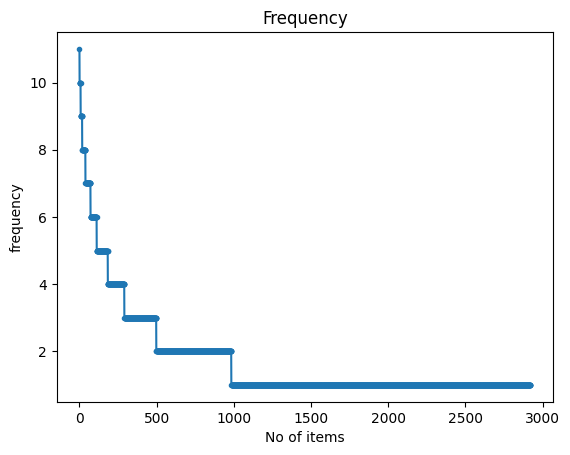

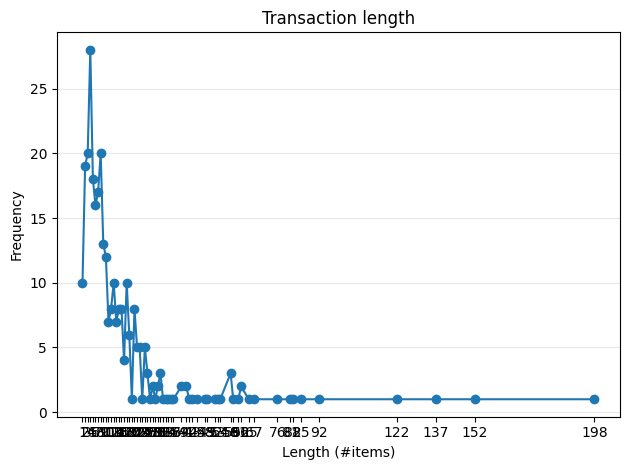

negative
Database size (total no of transactions) : 194
Number of items : 1531
Minimum Transaction Size : 1
Average Transaction Size : 12.989690721649485
Maximum Transaction Size : 67
Standard Deviation Transaction Size : 10.839974555226371
Variance in Transaction Sizes : 118.1138828054057
Sparsity : 0.991515551455487


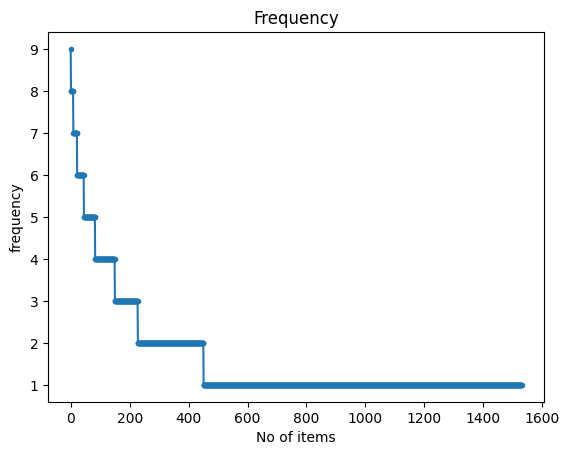

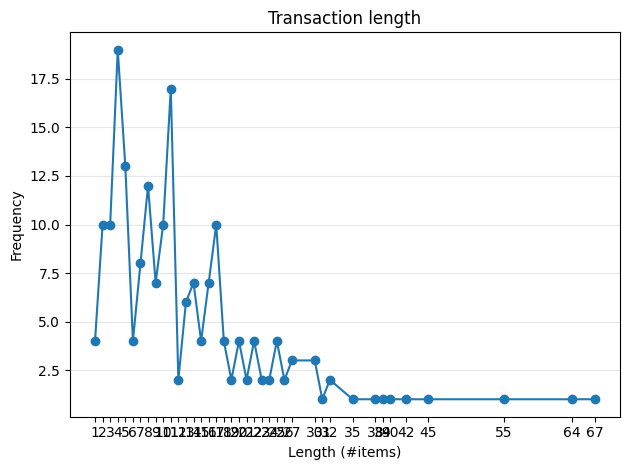

neutral
Database size (total no of transactions) : 296
Number of items : 1166
Minimum Transaction Size : 1
Average Transaction Size : 5.993243243243243
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 4.8740856684095
Variance in Transaction Sizes : 23.837242327072836
Sparsity : 0.9948599972184878


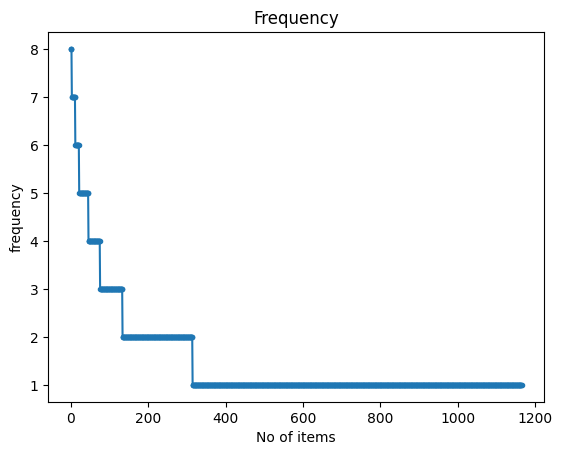

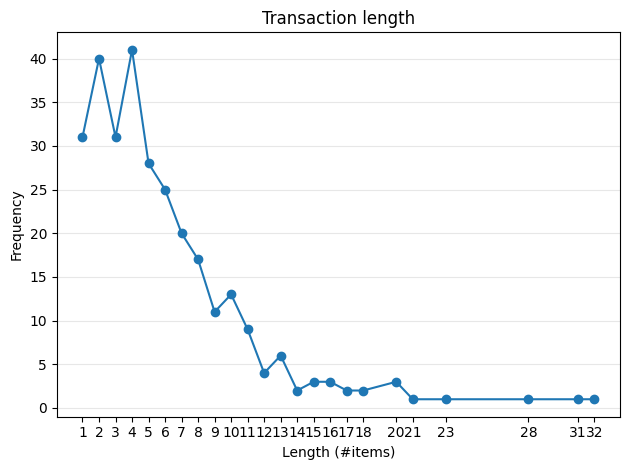

In [56]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

print('positive')
obj1 = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj1.run()
obj1.printStats()
obj1.plotGraphs()

print('negative')
obj2 = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj2.run()
obj2.printStats()
obj2.plotGraphs()

print('neutral')
obj3 = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj3.run()
obj3.printStats()
obj3.plotGraphs()

##### Positive Category : 
Most vocabulary-rich with 2,922 unique terms. Frequency distribution shows items appearing 1-11 times, with transaction lengths ranging up to 198 items—indicating discussions are verbose and varied. High variance (498.23) means some posts discuss many topics while others focus narrowly.
##### Negative Category : 
Moderate vocabulary (1,531 items) with more consistent transaction lengths (max 67). The transaction length plot shows more regular distribution with peaks around 12-15 items, suggesting negative sentiment posts tend to be more focused and structured, discussing fewer distinct topics per comment.
##### Neutral Category : 
Smallest vocabulary (1,166 items) and shortest transactions (avg 5.99 items, max 32). This indicates neutral discussions are more concise and uniform—people discussing neutral stock information use simpler, more repetitive language without elaboration.
##### Summary:
Positive sentiment posts are the most elaborate and diverse, while neutral posts are the most constrained and formulaic—people express complexity when optimistic but brevity when neutral.

Extracted the transactional patterns from our databases:

In [57]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5
obj1_1 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj1_1.mine()
frequentPatternsDF_positive= obj1_1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive)))
print('Runtime: ' + str(obj1_1.getRuntime()))
obj1_1.save('freq_patterns_positive_minSup5.txt')
frequentPatternsDF_positive 

obj2_1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj2_1.mine()
frequentPatternsDF_negative= obj2_1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative)))
print('Runtime: ' + str(obj2_1.getRuntime()))
obj2_1.save('freq_patterns_negative_minSup5.txt')
frequentPatternsDF_negative

obj3_1 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj3_1.mine()
frequentPatternsDF_neutral= obj3_1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral)))
print('Runtime: ' + str(obj3_1.getRuntime()))
obj3_1.save('freq_patterns_neutral_minSup5.txt')
frequentPatternsDF_neutral

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 189
Runtime: 0.003658294677734375
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 83
Runtime: 0.001074075698852539
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 51
Runtime: 0.0007290840148925781


,Patterns,Support
0,an,5
1,money,5
2,know,5
3,same,5
4,silver,5
5,why,5
6,time,5
7,xi,5
8,someone,5
9,puts,5


Filtering out any patterns that are common across multiple categories:

In [58]:
import pandas as pd

dfs = [frequentPatternsDF_positive , frequentPatternsDF_negative, frequentPatternsDF_neutral]

pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

total_patterns_count = sum(len(df) for df in dfs)

discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)


final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(final_pattern_df)

print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
140  country       10
141  america       10
142   thanks       10
143    where       10
144   pretty       10
..       ...      ...
28    demand        5
29   insider        5
30    likely        5
31      line        5
0      being        5

[221 rows x 2 columns]
Number of patterns discarded: 102


Converting the patterns into binary data within the columns of our document-term matrix:

In [59]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms = count_vect.get_feature_names_out()

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])


for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,position,state,use,vs,nice,demand,insider,likely,line,being
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 17 :** 
I choose to implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'positive' category.

k values : 50, 100, and 150

MaxFPGrowth:3, 6, and 9

In [60]:
from PAMI.frequentPattern.basic import FPGrowth as alg
from PAMI.frequentPattern.topk import FAE as al
from PAMI.frequentPattern.maximal import MaxFPGrowth as g


for k in [50, 100, 150]:
    print(f'\nk={k}')
    obj1_2=al.FAE(iFile='td_freq_db_positive.csv', k=k, sep='\t')
    obj1_2.mine()
    frequentPatternsDF_FAE = obj1_2.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_FAE)))
    print('Runtime: ' + str(obj3_1.getRuntime()))
    
    obj1_2.save('freq_patterns_positive_FAE_k' + str(k) + '.txt')
    print(frequentPatternsDF_FAE)
    
for minSup in [3, 6, 9]:
    print(f'\nminSup={minSup}')
    obj1_3 = g.MaxFPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup, sep='\t')
    obj1_3.mine()
    frequentPatternsDF_MaxFP = obj1_3.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF_MaxFP)))
    print('Runtime: ' + str(obj1_3.getRuntime()))
    
    obj1_3.save('freq_patterns_positive_MaxFPGrowth_minSup' + str(minSup) + '.txt')
    print(frequentPatternsDF_MaxFP)


k=50
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 50
Runtime: 0.0007290840148925781
     Patterns  Support
0        most       11
1     country       10
2     america       10
3      thanks       10
4     someone       10
5       where       10
6      pretty       10
7    everyone       10
8       great        9
9       still        9
10        lol        9
11    already        9
12       call        9
13       lmao        9
14      after        9
15   american        9
16      point        9
17       love        9
18         50        8
19         go        8
20     reason        8
21    trading        8
22       free        8
23       bond        8
24     moving        8
25        won        8
26    nothing        8
27         xi        8
28      haven        8
29        own        8
30    selling        8
31        big        8
32        usa        8
33        hey        8
34       does        8
35  currently        8
36    another 

All three identify identical top patterns ("most," "country," "america")

Runtime difference: Almost 3 times between  Top-K and MaxFPGrowth algorithms, but MaxFPGrowth algorithms only adds 62 new patterns

Precision-recall trade-off: FPGrowth algorithm has highest confidence , MaxFPGrowth algorithms has broadest coverage 

### 5.5 Dimensionality Reduction

### 2D-document-term matrix

In [62]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

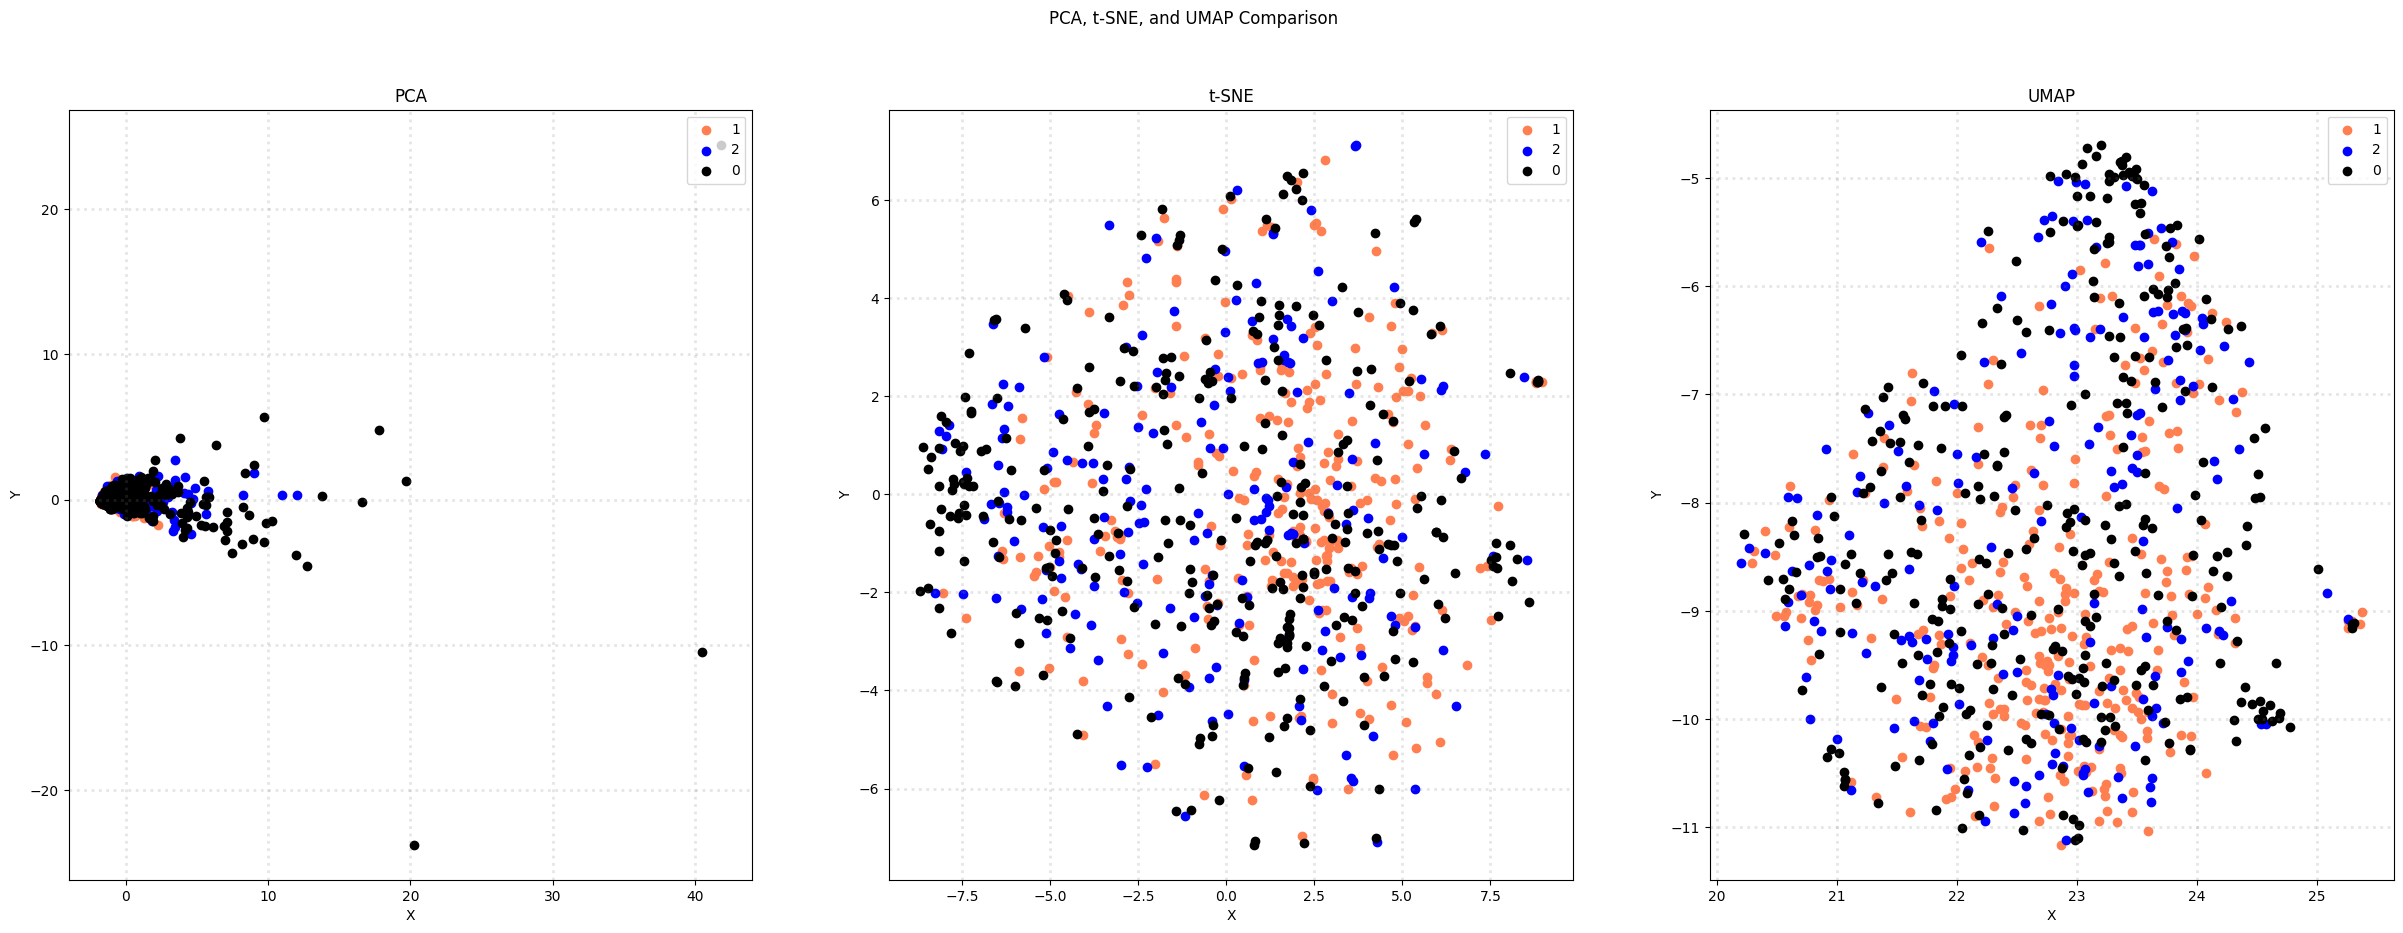

In [63]:
col = ['coral', 'blue', 'black']
categories = X['category'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category'] == category].T[0]
        ys = X_reduced[X['category'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

### 2D-augmented data

In [64]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

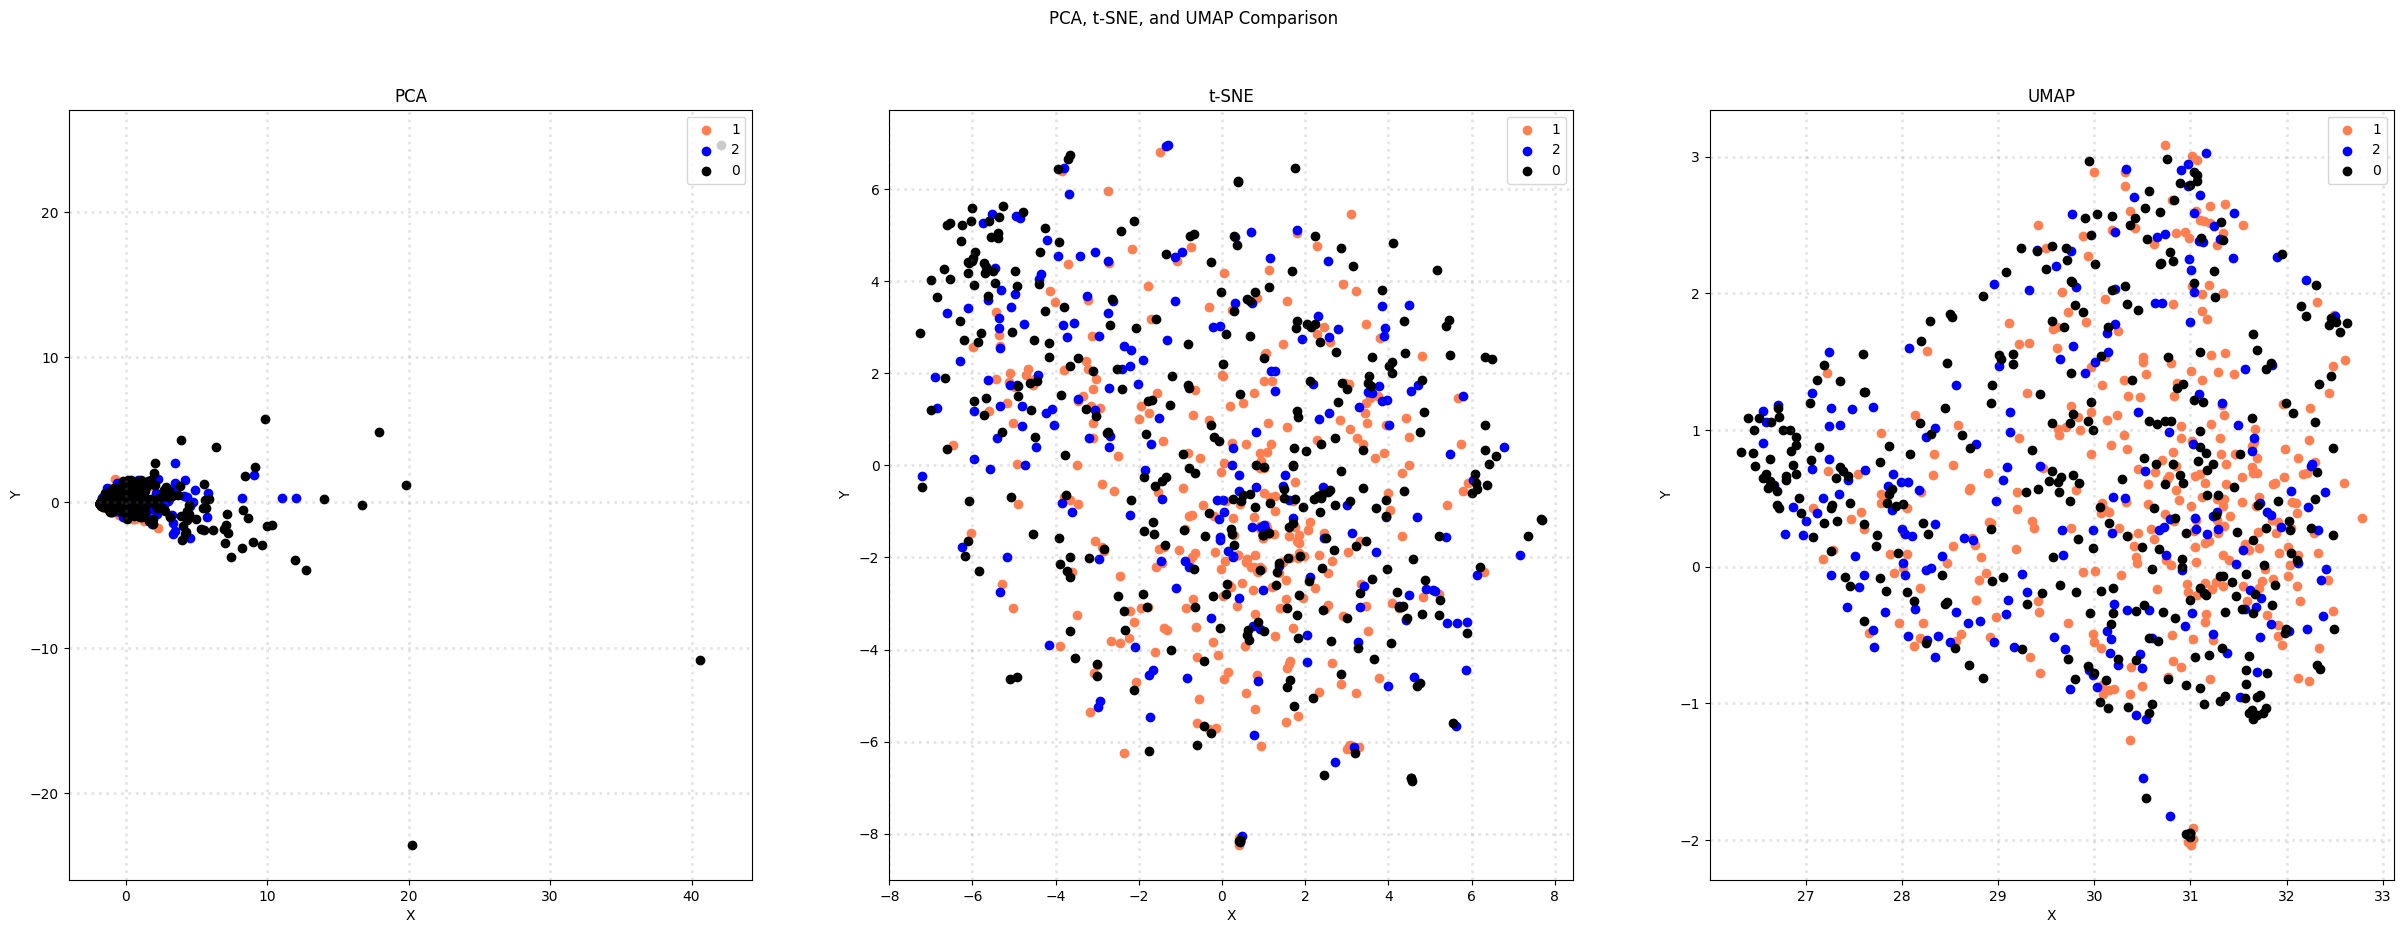

In [65]:
# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = X['category'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category'] == category].T[0]
        ys = X_reduced[X['category'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

**PCA**: Unchanged—all sentiment classes remain compressed in the lower-left cluster. The document-term matrix dominates, overshadowing binary pattern features. Linear projection cannot capture the hierarchical relationships introduced by new patterns.

**t-SNE**: Structurally identical to previous version, just mirrored on y-axis with minor point repositioning. The algorithm's stability means small data changes produce visually different but mathematically equivalent embeddings. Binary patterns didn't significantly alter high-dimensional relationships.

**UMAP**: Most noticeable change—clusters appear more compact. UMAP's complex distance metric better detects pattern-induced noise reduction within categories, creating more coherent groups. However, inter-class overlap persists, indicating weak boundary separation.


### 3D-document-term matrix


3D PCA with 3 Different Angles:


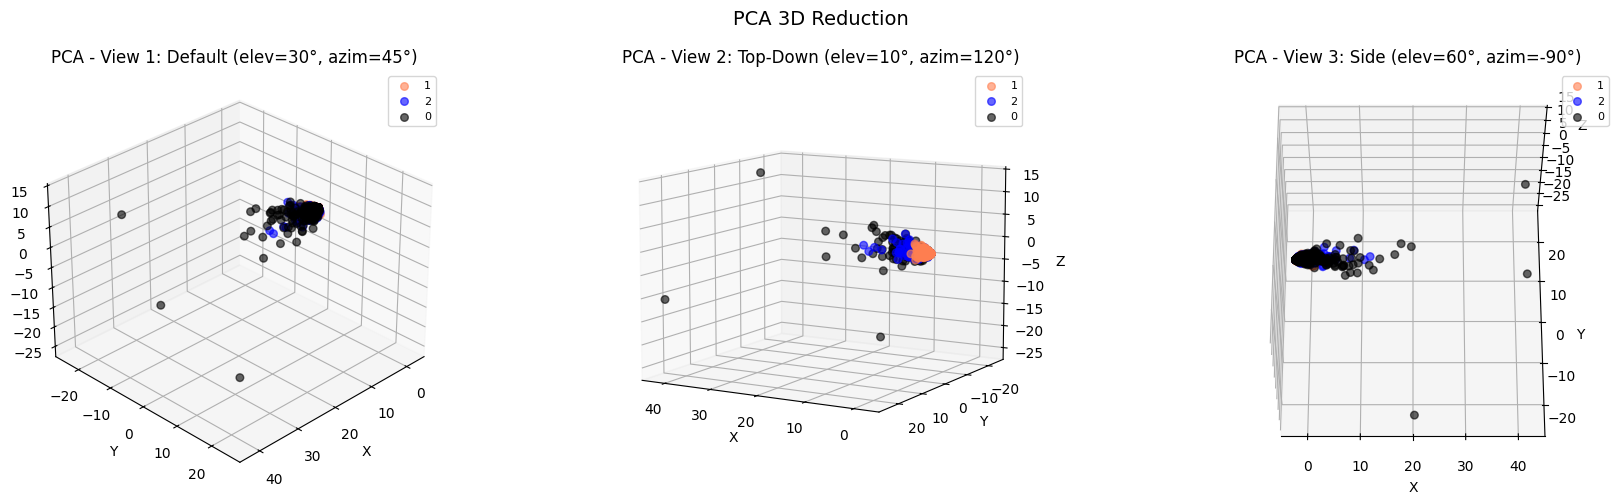


3D t-SNE with 3 Different Angles:


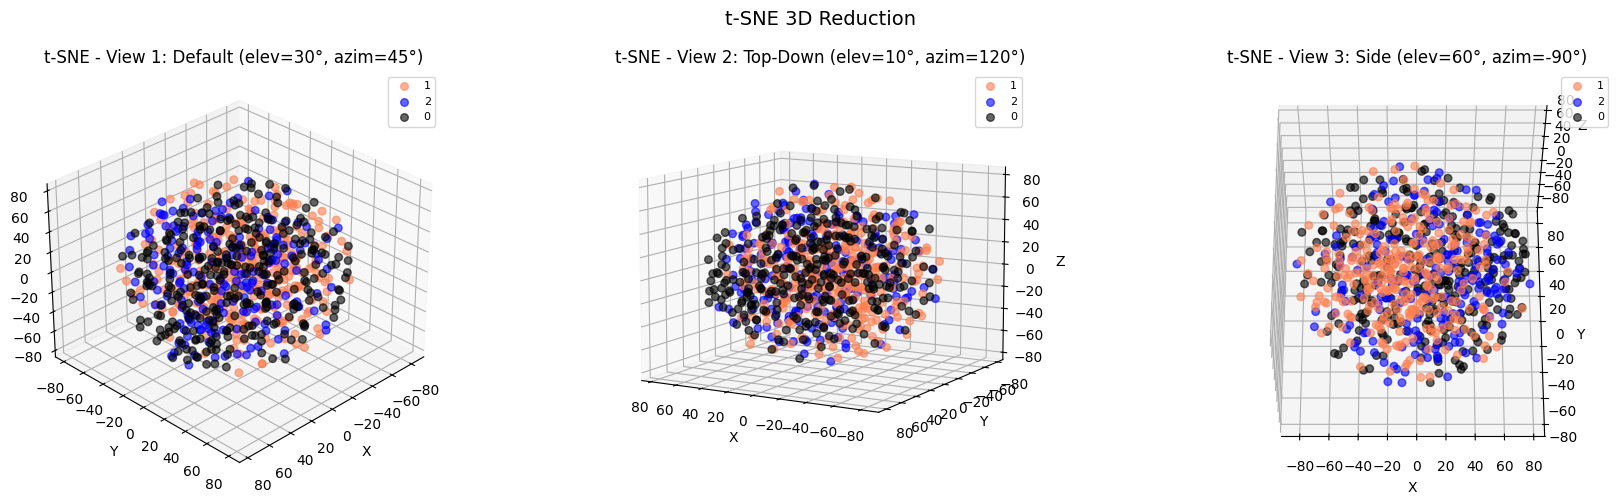


3D UMAP with 3 Different Angles:


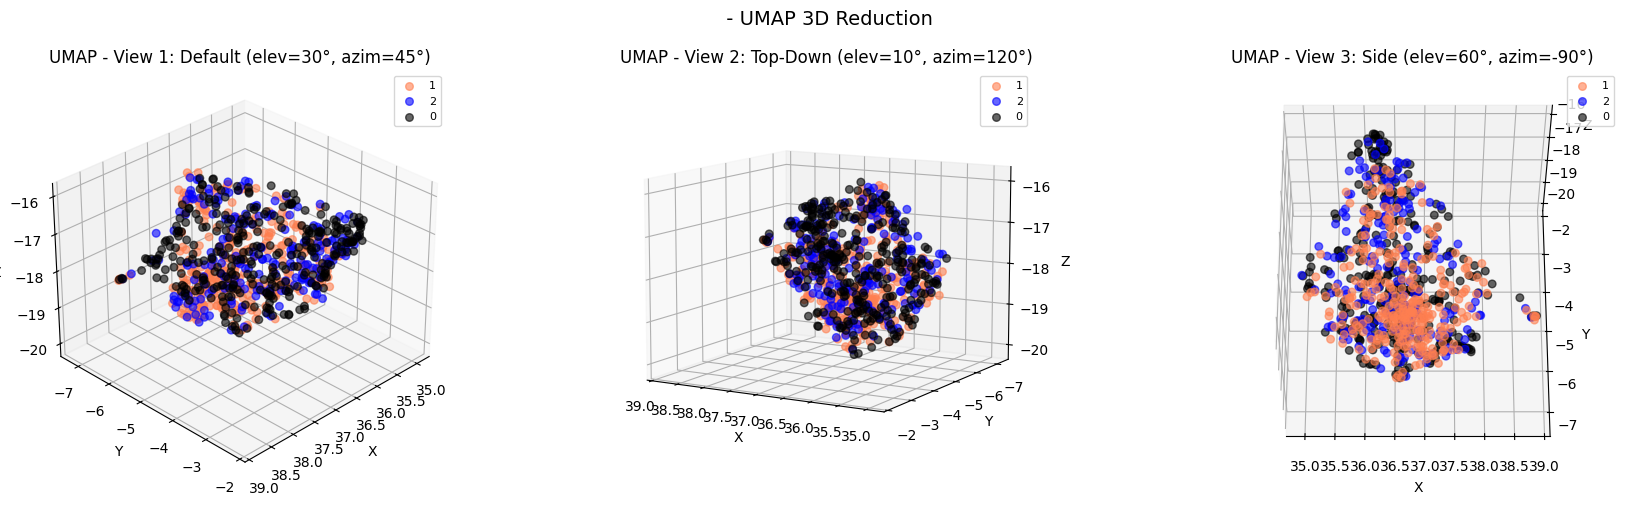

In [69]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

col = ['coral', 'blue', 'black']
categories = X['category'].unique()

angles = [
    (30, 45, "View 1: Default (elev=30°, azim=45°)"),
    (10, 120, "View 2: Top-Down (elev=10°, azim=120°)"),
    (60, -90, "View 3: Side (elev=60°, azim=-90°)")
]

def plot_3d_scatter(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category'] == category].T[0]
        ys = X_reduced[X['category'] == category].T[1]
        zs = X_reduced[X['category'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, s=30, alpha=0.6)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend(loc='upper right', fontsize=8)
    ax.view_init(elev=elev, azim=azim)
    
    
print("\n3D PCA with 3 Different Angles:")
fig = plt.figure(figsize=(18, 5))

for idx, (elev, azim, view_name) in enumerate(angles):
    ax = fig.add_subplot(1, 3, idx+1, projection='3d')
    plot_3d_scatter(ax, X_pca_tdm, f'PCA - {view_name}', elev, azim)

plt.suptitle('PCA 3D Reduction', fontsize=14)
plt.tight_layout()
plt.show()

print("\n3D t-SNE with 3 Different Angles:")
fig = plt.figure(figsize=(18, 5))

for idx, (elev, azim, view_name) in enumerate(angles):
    ax = fig.add_subplot(1, 3, idx+1, projection='3d')
    plot_3d_scatter(ax, X_tsne_tdm, f't-SNE - {view_name}', elev, azim)

plt.suptitle('t-SNE 3D Reduction', fontsize=14)
plt.tight_layout()
plt.show()

print("\n3D UMAP with 3 Different Angles:")
fig = plt.figure(figsize=(18, 5))

for idx, (elev, azim, view_name) in enumerate(angles):
    ax = fig.add_subplot(1, 3, idx+1, projection='3d')
    plot_3d_scatter(ax, X_umap_tdm, f'UMAP - {view_name}', elev, azim)

plt.suptitle(' - UMAP 3D Reduction', fontsize=14)
plt.tight_layout()
plt.show()

### 3D-augmented data


Augmented Dataset - 3D PCA with 3 Different Angles:


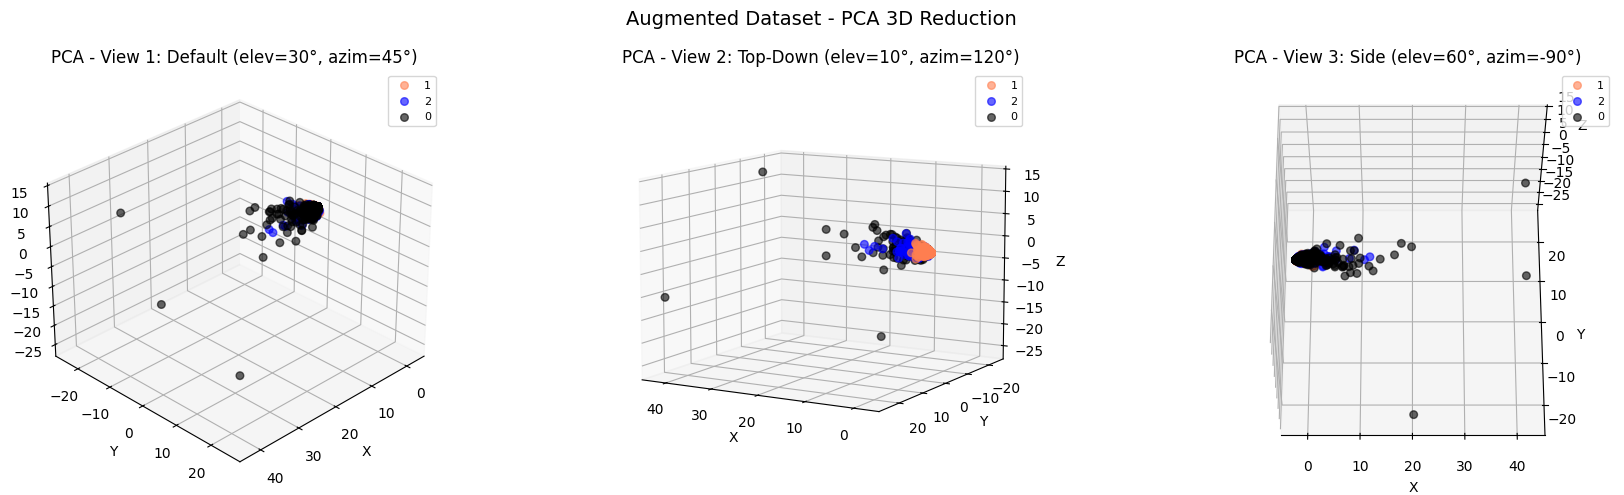


Augmented Dataset - 3D t-SNE with 3 Different Angles:


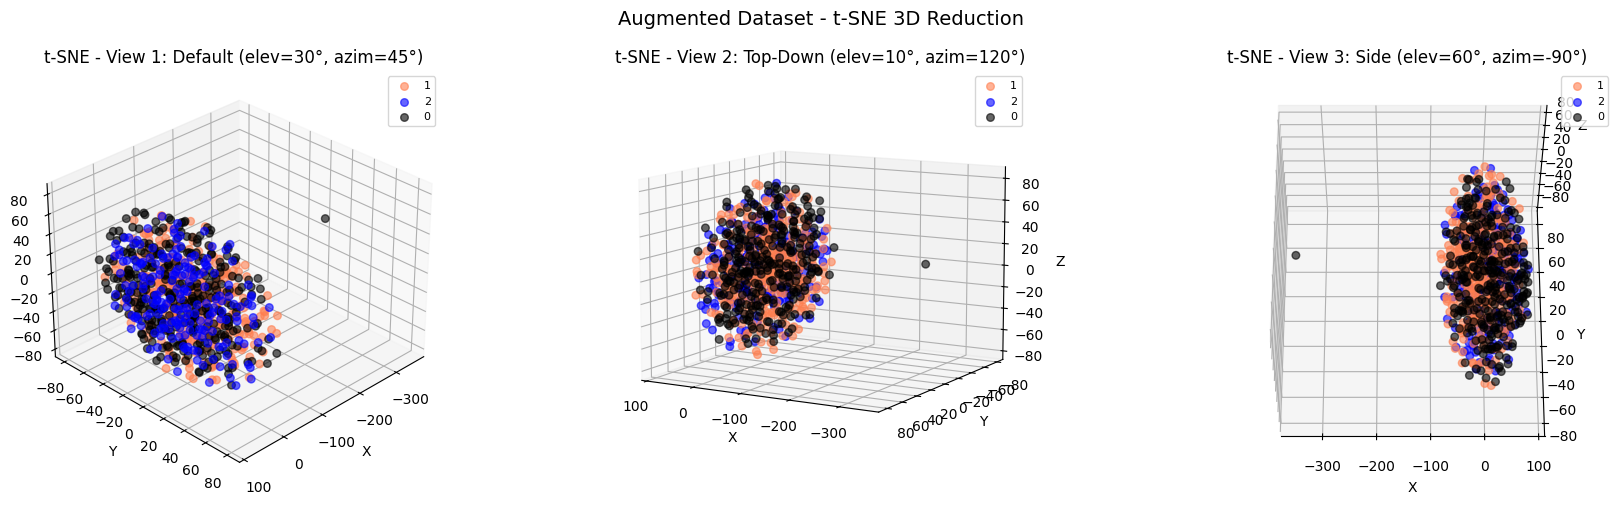


Augmented Dataset - 3D UMAP with 3 Different Angles:


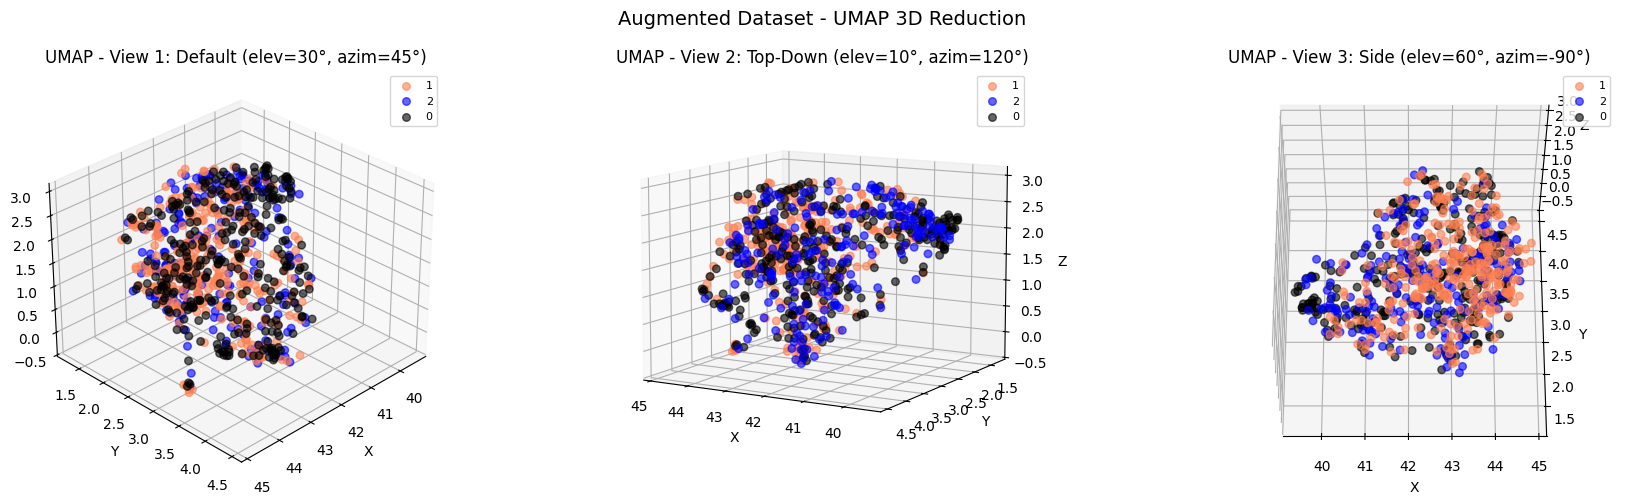

In [70]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

print("\nAugmented Dataset - 3D PCA with 3 Different Angles:")
fig = plt.figure(figsize=(18, 5))

for idx, (elev, azim, view_name) in enumerate(angles):
    ax = fig.add_subplot(1, 3, idx+1, projection='3d')
    plot_3d_scatter(ax, X_pca_aug, f'PCA - {view_name}', elev, azim)

plt.suptitle('Augmented Dataset - PCA 3D Reduction', fontsize=14)
plt.tight_layout()
plt.show()

print("\nAugmented Dataset - 3D t-SNE with 3 Different Angles:")
fig = plt.figure(figsize=(18, 5))

for idx, (elev, azim, view_name) in enumerate(angles):
    ax = fig.add_subplot(1, 3, idx+1, projection='3d')
    plot_3d_scatter(ax, X_tsne_aug, f't-SNE - {view_name}', elev, azim)

plt.suptitle('Augmented Dataset - t-SNE 3D Reduction', fontsize=14)
plt.tight_layout()
plt.show()

print("\nAugmented Dataset - 3D UMAP with 3 Different Angles:")
fig = plt.figure(figsize=(18, 5))

for idx, (elev, azim, view_name) in enumerate(angles):
    ax = fig.add_subplot(1, 3, idx+1, projection='3d')
    plot_3d_scatter(ax, X_umap_aug, f'UMAP - {view_name}', elev, azim)

plt.suptitle('Augmented Dataset - UMAP 3D Reduction', fontsize=14)
plt.tight_layout()
plt.show()

PCA Results: Both original and augmented PCA visualizations are virtually identical across all three viewing angles, with all sentiment classes compressed into a tight cluster. The linear nature of PCA fails to benefit from augmented features—the document-term matrix structure dominates, preventing the binary patterns from reshaping the dimensional space. PCA's inability to adapt demonstrates that linear reduction cannot capture the non-linear relationships introduced by data augmentation.

t-SNE Results: The augmented t-SNE shows notable improvement compared to the original. While the original displays dispersed mixing of classes across a wider space, the augmented version exhibits more compact, tightly-grouped clusters with clearer visual separation between sentiment categories. The tighter spherical packing in augmented t-SNE suggests that pattern features have reduced noise and improved class cohesion, allowing the algorithm to better distinguish sentiment boundaries despite increased data complexity.

UMAP Results: UMAP demonstrates the most dramatic transformation. The augmented UMAP visualization shows dramatically more compact and densely clustered data with superior spatial coherence. The scale contraction (comparing axis ranges across images) and tighter point concentration indicate that UMAP's sophisticated distance metrics effectively leveraged the augmented features to reduce dimensionality while preserving meaningful class structure. Classes show better separation in the augmented version with minimal overlap compared to the original.

### 5.6 Discretization and Binarization

In [72]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

,text,category,category_name,unigrams,tokenized_text,bin_category
0,"""We"" who?",1,neutral,"[``, We, '', who, ?]","{""We"", who?}","[0, 1, 0]"
1,Chicken jockey,2,negative,"[Chicken, jockey]","{Chicken, jockey}","[0, 0, 1]"
2,Not great Bob,0,positive,"[Not, great, Bob]","{Not, Bob, great}","[1, 0, 0]"
3,"Speak for yourself, my wife is being harder on...",0,positive,"[Speak, for, yourself, ,, my, wife, is, being,...","{still, when, *pissed*., chips, it's, than, pi...","[1, 0, 0]"
4,Where can I read this?,1,neutral,"[Where, can, I, read, this, ?]","{can, I, this?, Where, read}","[0, 1, 0]"
5,That's a chart since April 6,1,neutral,"[That, 's, a, chart, since, April, 6]","{a, since, 6, That's, April, chart}","[0, 1, 0]"
6,200k loss in a month.. haha,0,positive,"[200k, loss, in, a, month, .., haha]","{loss, a, in, haha, month.., 200k}","[1, 0, 0]"
7,High risk high beta portfolio but it's 50% uni...,0,positive,"[High, risk, high, beta, portfolio, but, it, '...","{but, and, 20%, portfolio, reddit, 50%, High, ...","[1, 0, 0]"
8,FELON,1,neutral,[FELON],{FELON},"[0, 1, 0]"


# 6. Data Exploration

With random record

In [75]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

["Too late. Foreign holders of US treasuries have already made the decision to unwind. The calculus is now about how they do that at least cost to themselves. They'll want to avoid spooking the market and $US too much, so you can anticipate a long slow exit... Unless someone blinks and 'panic' sells. If you're lucky Japan, China and the UK will co-ordinate to prevent a massive crash - it's in their best interests. Ironically the biggest wild card is Trump himself. He's capable of of even worse dumbassery that could trigger a collapse. Defaulting on debt has been one of his go to solutions for when everything turns to shit.  How will this all end? With a bang, or a whimper."]
['The stock market is wobbling. Big indexes like the S&P 500 and Nasdaq are down 8–11%. Small and mid-sized companies are doing even worse—down 13–16%. Retail giants like FedEx and Nike are warning about tough times.  Seems like the market can’t agree if we’re just slowing down or headed into a real recession. Want

With catagory

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

doc_1=[]
doc_cat1 = X[X['category_name'] == 'positive'].iloc[0]['text']
doc_1.append(doc_cat1)

doc_2=[]
doc_cat2 = X[X['category_name'] == 'negative'].iloc[0]['text']
doc_2.append(doc_cat2)

doc_3=[]
doc_cat3 = X[X['category_name'] == 'neutral'].iloc[0]['text']
doc_3.append(doc_cat3)

print(f"\nText 1 (positive): {doc_1[0][:500]}")
print(f"Text 2 (negative): {doc_2[0][:500]}")
print(f"Text 3 (neutral): {doc_3[0][:500]}")

doc_vec_count_1 = count_vect.transform(doc_1)
doc_vec_count_2 = count_vect.transform(doc_2)
doc_vec_count_3 = count_vect.transform(doc_3)

doc_vec_count_1_bin = binarize(doc_vec_count_1)
doc_vec_count_2_bin = binarize(doc_vec_count_2)
doc_vec_count_3_bin = binarize(doc_vec_count_3)

print("Let's take a look at the count vectors:")
print(doc_vec_count_1_bin.todense())
print(doc_vec_count_2_bin.todense())
print(doc_vec_count_3_bin.todense())


cat_cos_sim_count_1_2 = cosine_similarity(doc_vec_count_1, doc_vec_count_2, dense_output=True)
cat_cos_sim_count_1_3 = cosine_similarity(doc_vec_count_1, doc_vec_count_3, dense_output=True)
cat_cos_sim_count_2_3 = cosine_similarity(doc_vec_count_2, doc_vec_count_3, dense_output=True)

cat_cos_sim_count_1_1 = cosine_similarity(doc_vec_count_1, doc_vec_count_1, dense_output=True)
cat_cos_sim_count_2_2 = cosine_similarity(doc_vec_count_2, doc_vec_count_2, dense_output=True)
cat_cos_sim_count_3_3 = cosine_similarity(doc_vec_count_3, doc_vec_count_3, dense_output=True)

cat_cos_sim_count_bin_1_2 = cosine_similarity(doc_vec_count_1_bin, doc_vec_count_2_bin, dense_output=True)
cat_cos_sim_count_bin_1_3 = cosine_similarity(doc_vec_count_1_bin, doc_vec_count_3_bin, dense_output=True)
cat_cos_sim_count_bin_2_3 = cosine_similarity(doc_vec_count_2_bin, doc_vec_count_3_bin, dense_output=True)

print("Cosine Similarity using catagory bw 1 and 2: %(x)f" %{"x":cat_cos_sim_count_1_2})
print("Cosine Similarity using catagory bw 1 and 3: %(x)f" %{"x":cat_cos_sim_count_1_3})
print("Cosine Similarity using catagory bw 2 and 3: %(x)f" %{"x":cat_cos_sim_count_2_3})

print("Cosine Similarity using catagory bw 1 and 1: %(x)f" %{"x":cat_cos_sim_count_1_1})
print("Cosine Similarity using catagory bw 2 and 2: %(x)f" %{"x":cat_cos_sim_count_2_2})
print("Cosine Similarity using catagory bw 3 and 3: %(x)f" %{"x":cat_cos_sim_count_3_3})

print("Cosine Similarity using catagory bin bw 1 and 2: %(x)f" %{"x":cat_cos_sim_count_bin_1_2})
print("Cosine Similarity using catagory bin bw 1 and 3: %(x)f" %{"x":cat_cos_sim_count_bin_1_3})
print("Cosine Similarity using catagory bin bw 2 and 3: %(x)f" %{"x":cat_cos_sim_count_bin_2_3})


Text 1 (positive): Not great Bob
Text 2 (negative): Chicken jockey
Text 3 (neutral): "We" who?
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using catagory bw 1 and 2: 0.000000
Cosine Similarity using catagory bw 1 and 3: 0.000000
Cosine Similarity using catagory bw 2 and 3: 0.000000
Cosine Similarity using catagory bw 1 and 1: 1.000000
Cosine Similarity using catagory bw 2 and 2: 1.000000
Cosine Similarity using catagory bw 3 and 3: 1.000000
Cosine Similarity using catagory bin bw 1 and 2: 0.000000
Cosine Similarity using catagory bin bw 1 and 3: 0.000000
Cosine Similarity using catagory bin bw 2 and 3: 0.000000


1.Random sampling with count vectors captures meaningful relationships (0.19-0.35), while category grouping produces zero similarity. Forcing category boundaries destroys semantic information.

2.Binary categorization collapses all intra-category texts to identical vectors, eliminating discrimination ability. Result: uniform 0.000 similarity.

3.Count vectors preserve vocabulary diversity; category reduction oversimplifies the semantic space. Vocabulary-level information outperforms categorical abstractions.

4.Long texts show measurable similarities; short colloquial texts fail across all methods, indicating minimum vocabulary threshold is necessary.

# 7. Data Classification

In [102]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [103]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5040983606557377

Classification Report:
               precision    recall  f1-score   support

    positive     0.5132    0.7800    0.6190       100
     neutral     0.6250    0.2941    0.4000        85
    negative     0.3846    0.3390    0.3604        59

    accuracy                         0.5041       244
   macro avg     0.5076    0.4710    0.4598       244
weighted avg     0.5210    0.5041    0.4802       244



In [109]:
X_augmented = augmented_df.values
y = X['category']
X_train_bay, X_test_bay, y_train_bay, y_test_bay = train_test_split(
    X_augmented, y, test_size=0.2, random_state=42
)

nb_classifier_bay = MultinomialNB()
nb_classifier_bay.fit(X_train_bay, y_train_bay)
y_pred_bay = nb_classifier_bay.predict(X_test_bay)

print("Accuracy:", accuracy_score(y_test_bay, y_pred_bay))
print("\nClassification Report(augmented data):\n", classification_report(y_test_bay, y_pred_bay, target_names=target_names, digits=4))

Accuracy: 0.5214723926380368

Classification Report(augmented data):
               precision    recall  f1-score   support

    positive     0.5474    0.7536    0.6341        69
     neutral     0.5667    0.3148    0.4048        54
    negative     0.4211    0.4000    0.4103        40

    accuracy                         0.5215       163
   macro avg     0.5117    0.4895    0.4831       163
weighted avg     0.5228    0.5215    0.5032       163



Data augmentation improved accuracy from 50.41% to 52.15% (+1.7%), showing limited gains. Positive sentiment performs best (recall 0.78, f1 0.634), while negative sentiment improved most (precision 0.38→0.42). Neutral sentiment persistently fails (recall ~0.29), misclassified as positive. The marginal improvement confirms augmented features provide minimal benefit—class imbalance dominates. Solution needed: Class balancing or resampling, not just feature engineering.

### Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5163934426229508

Classification Report:
               precision    recall  f1-score   support

    positive     0.6105    0.5800    0.5949       100
     neutral     0.4912    0.6588    0.5628        85
    negative     0.3429    0.2034    0.2553        59

    accuracy                         0.5164       244
   macro avg     0.4815    0.4807    0.4710       244
weighted avg     0.5042    0.5164    0.5016       244



In [110]:
dt_classifier_bay = DecisionTreeClassifier(random_state=42)
dt_classifier_bay.fit(X_train_bay, y_train_bay)

# Predict and evaluate
y_pred_dt_bay = dt_classifier_bay.predict(X_test_bay)
print("Decision Tree Accuracy (bayes):", accuracy_score(y_test_bay, y_pred_dt_bay))
print("\nClassification Report:\n", classification_report(y_test_bay, y_pred_dt_bay, target_names=target_names, digits=4))

Decision Tree Accuracy (bayes): 0.5460122699386503

Classification Report:
               precision    recall  f1-score   support

    positive     0.6324    0.6232    0.6277        69
     neutral     0.5373    0.6667    0.5950        54
    negative     0.3571    0.2500    0.2941        40

    accuracy                         0.5460       163
   macro avg     0.5089    0.5133    0.5056       163
weighted avg     0.5333    0.5460    0.5350       163



Using the augmented data, the Decision Tree’s accuracy increased slightly, showing that the added pattern features helped the model capture more meaningful relationships between words.

# TF-IDF features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

texts = X['text'].fillna('').astype(str).values
labels=X['category_name'].values


tfidf_vect = TfidfVectorizer(
    max_features=100,
    stop_words='english',
    min_df=1,
    max_df=0.95,
    lowercase=True,
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=False
)

X_tfidf = tfidf_vect.fit_transform(texts)
feature_names_tfidf = tfidf_vect.get_feature_names_out()
idf_values = tfidf_vect.idf_
sorted_indices = np.argsort(idf_values)

print("[10 Most Common Words (Lowest IDF)]:")
print(f"{'Word':<20} {'IDF Value':<15} {'Document Freq':<15}")
print(f"{'-'*50}")
for idx in sorted_indices[:10]:
    word = feature_names_tfidf[idx]
    idf = idf_values[idx]
    doc_freq = np.sum(X_tfidf[:, idx].toarray() > 0)
    print(f"{word:<20} {idf:<15.4f} {doc_freq:<15}")

print("\n[10 Rarest Words (Highest IDF)]:")
print(f"{'Word':<20} {'IDF Value':<15} {'Document Freq':<15}")
print(f"{'-'*50}")
for idx in sorted_indices[-10:][::-1]:
    word = feature_names_tfidf[idx]
    idf = idf_values[idx]
    doc_freq = np.sum(X_tfidf[:, idx].toarray() > 0)
    print(f"{word:<20} {idf:<15.4f} {doc_freq:<15}")

print(f"\nTF-IDF Matrix Shape: {X_tfidf.shape}")
print(f"Total Features: {len(feature_names_tfidf)}")


[10 Most Common Words (Lowest IDF)]:
Word                 IDF Value       Document Freq  
--------------------------------------------------
just                 3.2133          88             
trump                3.4115          72             
like                 3.4535          69             
china                3.6244          58             
market               3.6589          56             
think                3.8308          47             
going                3.8733          45             
people               3.9408          42             
good                 3.9884          40             
money                4.0910          36             

[10 Rarest Words (Highest IDF)]:
Word                 IDF Value       Document Freq  
--------------------------------------------------
technology           5.6225          7              
portfolio            5.5047          8              
invest               5.3041          10             
tariff               5.3041     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print("COUNT VECTORIZER + MULTINOMIAL NAIVE BAYES")

count_vec = CountVectorizer(max_features=5000, stop_words='english', min_df=2)
X_train_count = count_vec.fit_transform(X_train)
X_test_count = count_vec.transform(X_test)

print(f"\nTraining set shape: {X_train_count.shape}")
print(f"Test set shape: {X_test_count.shape}")

clf_count = MultinomialNB()
clf_count.fit(X_train_count, y_train)
y_pred_count = clf_count.predict(X_test_count)
acc_count = accuracy_score(y_test, y_pred_count)

print(f"\nAccuracy: {acc_count:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_count))
print(f"Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_count))

print("TF-IDF VECTORIZER + MULTINOMIAL NAIVE BAYES")

tfidf_vec = TfidfVectorizer(max_features=5000, stop_words='english', min_df=2)
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

print(f"\nTraining set shape: {X_train_tfidf.shape}")
print(f"Test set shape: {X_test_tfidf.shape}")

clf_tfidf_mnb = MultinomialNB()
clf_tfidf_mnb.fit(X_train_tfidf, y_train)
y_pred_tfidf_mnb = clf_tfidf_mnb.predict(X_test_tfidf)
acc_tfidf_mnb = accuracy_score(y_test, y_pred_tfidf_mnb)

print(f"\nAccuracy: {acc_tfidf_mnb:.4f}")
print(f"Improvement: +{(acc_tfidf_mnb - acc_count)*100:.2f}%")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf_mnb))
print(f"Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tfidf_mnb))

print("TF-IDF VECTORIZER + GAUSSIAN NAIVE BAYES")

X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

print(f"\nTraining set shape: {X_train_tfidf_dense.shape}")
print(f"Test set shape: {X_test_tfidf_dense.shape}")

clf_tfidf_gnb = GaussianNB()
clf_tfidf_gnb.fit(X_train_tfidf_dense, y_train)
y_pred_tfidf_gnb = clf_tfidf_gnb.predict(X_test_tfidf_dense)
acc_tfidf_gnb = accuracy_score(y_test, y_pred_tfidf_gnb)

print(f"\nAccuracy: {acc_tfidf_gnb:.4f}")
print(f"Improvement vs Count: +{(acc_tfidf_gnb - acc_count)*100:.2f}%")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf_gnb))
print(f"Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tfidf_gnb))


print("SUMMARY COMPARISON")


summary = pd.DataFrame({
    'Classifier': [
        'Count + Multinomial NB',
        'TF-IDF + Multinomial NB',
        'TF-IDF + Gaussian NB'
    ],
    'Accuracy': [acc_count, acc_tfidf_mnb, acc_tfidf_gnb],
    'Improvement': [
        '0.00%',
        f'+{(acc_tfidf_mnb - acc_count)*100:.2f}%',
        f'+{(acc_tfidf_gnb - acc_count)*100:.2f}%'
    ]
})

print("\n" + summary.to_string(index=False))

best_acc = max(acc_count, acc_tfidf_mnb, acc_tfidf_gnb)
if best_acc == acc_tfidf_gnb:
    best_model = "TF-IDF + Gaussian NB"
elif best_acc == acc_tfidf_mnb:
    best_model = "TF-IDF + Multinomial NB"
else:
    best_model = "Count + Multinomial NB"

print(f"\nBest Model: {best_model} (Accuracy: {best_acc:.4f})")

COUNT VECTORIZER + MULTINOMIAL NAIVE BAYES

Training set shape: (650, 1185)
Test set shape: (163, 1185)

Accuracy: 0.4479

Classification Report:
              precision    recall  f1-score   support

    negative       0.43      0.41      0.42        39
     neutral       0.50      0.34      0.41        61
    positive       0.43      0.57      0.49        63

    accuracy                           0.45       163
   macro avg       0.45      0.44      0.44       163
weighted avg       0.46      0.45      0.44       163

Confusion Matrix:
[[16  7 16]
 [ 8 21 32]
 [13 14 36]]
TF-IDF VECTORIZER + MULTINOMIAL NAIVE BAYES

Training set shape: (650, 1185)
Test set shape: (163, 1185)

Accuracy: 0.4479
Improvement: +0.00%

Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.15      0.25        39
     neutral       0.46      0.41      0.43        61
    positive       0.42      0.67      0.52        63

    accuracy                     

# Naive Bayes classifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print("CLASSIFIER 1: WORD FREQUENCY (COUNT VECTORIZER)")


count_vec = CountVectorizer(max_features=5000, stop_words='english', min_df=2)
X_train_count = count_vec.fit_transform(X_train)
X_test_count = count_vec.transform(X_test)

print(f"\nFeature Matrix: {X_train_count.shape}")
print(f"Vocabulary: {len(count_vec.get_feature_names_out())} words")
print(f"Sparsity: {(1 - X_train_count.nnz / (X_train_count.shape[0] * X_train_count.shape[1])) * 100:.2f}%")

print(f"\n{'Classifier':<30} {'Accuracy':<12} {'Precision':<12} {'Recall':<12}")
print("-" * 70)

classifiers_count = [
    ('Multinomial NB', MultinomialNB()),
    ('Bernoulli NB', BernoulliNB()),
]

results_count = {}
for name, clf in classifiers_count:
    if name == 'Bernoulli NB':
        X_train_binary = (X_train_count > 0).astype(int)
        X_test_binary = (X_test_count > 0).astype(int)
        clf.fit(X_train_binary, y_train)
        y_pred = clf.predict(X_test_binary)
    else:
        clf.fit(X_train_count, y_train)
        y_pred = clf.predict(X_test_count)
    
    acc = accuracy_score(y_test, y_pred)
    results_count[name] = acc
    
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    print(f"{name:<30} {acc:<12.4f} {precision:<12.4f} {recall:<12.4f}")

best_count_model = max(results_count, key=results_count.get)
print(f"\nBest Count-based Model: {best_count_model} ({results_count[best_count_model]:.4f})")

for name, clf in classifiers_count:
    if name == best_count_model:
        if name == 'Bernoulli NB':
            X_train_binary = (X_train_count > 0).astype(int)
            X_test_binary = (X_test_count > 0).astype(int)
            clf.fit(X_train_binary, y_train)
            y_pred_best_count = clf.predict(X_test_binary)
        else:
            clf.fit(X_train_count, y_train)
            y_pred_best_count = clf.predict(X_test_count)

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_best_count))
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_count))

print("\n" + "="*80)
print("CLASSIFIER 2: TF-IDF FEATURES (TFIDF VECTORIZER)")
print("="*80)

tfidf_vec = TfidfVectorizer(max_features=5000, stop_words='english', min_df=2)
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

print(f"\nFeature Matrix: {X_train_tfidf.shape}")
print(f"Vocabulary: {len(tfidf_vec.get_feature_names_out())} words")
print(f"Sparsity: {(1 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1])) * 100:.2f}%")

print(f"\n{'Classifier':<30} {'Accuracy':<12} {'Precision':<12} {'Recall':<12}")
print("-" * 70)

classifiers_tfidf = [
    ('Multinomial NB', MultinomialNB()),
    ('Gaussian NB', GaussianNB()),
    ('Bernoulli NB', BernoulliNB()),
]

results_tfidf = {}
for name, clf in classifiers_tfidf:
    if name == 'Gaussian NB':
        X_train_dense = X_train_tfidf.toarray()
        X_test_dense = X_test_tfidf.toarray()
        clf.fit(X_train_dense, y_train)
        y_pred = clf.predict(X_test_dense)
    elif name == 'Bernoulli NB':
        X_train_binary = (X_train_tfidf > 0).astype(int)
        X_test_binary = (X_test_tfidf > 0).astype(int)
        clf.fit(X_train_binary, y_train)
        y_pred = clf.predict(X_test_binary)
    else:
        clf.fit(X_train_tfidf, y_train)
        y_pred = clf.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    results_tfidf[name] = acc
    
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    print(f"{name:<30} {acc:<12.4f} {precision:<12.4f} {recall:<12.4f}")

best_tfidf_model = max(results_tfidf, key=results_tfidf.get)
print(f"\nBest TF-IDF Model: {best_tfidf_model} ({results_tfidf[best_tfidf_model]:.4f})")

for name, clf in classifiers_tfidf:
    if name == best_tfidf_model:
        if name == 'Gaussian NB':
            X_train_dense = X_train_tfidf.toarray()
            X_test_dense = X_test_tfidf.toarray()
            clf.fit(X_train_dense, y_train)
            y_pred_best_tfidf = clf.predict(X_test_dense)
        elif name == 'Bernoulli NB':
            X_train_binary = (X_train_tfidf > 0).astype(int)
            X_test_binary = (X_test_tfidf > 0).astype(int)
            clf.fit(X_train_binary, y_train)
            y_pred_best_tfidf = clf.predict(X_test_binary)
        else:
            clf.fit(X_train_tfidf, y_train)
            y_pred_best_tfidf = clf.predict(X_test_tfidf)

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_best_tfidf))
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_tfidf))


print("DETAILED COMPARISON")


comparison_data = {
    'Feature Type': ['Word Frequency (Count)', 'TF-IDF'],
    'Best Classifier': [best_count_model, best_tfidf_model],
    'Accuracy': [results_count[best_count_model], results_tfidf[best_tfidf_model]],
    'Improvement': [
        '0.00%',
        f"+{(results_tfidf[best_tfidf_model] - results_count[best_count_model])*100:.2f}%"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))


print("NAIVE BAYES CLASSIFIER CHARACTERISTICS")


characteristics = """
MULTINOMIAL NAIVE BAYES
- Input: Counts (word frequency)
- Best for: Count-based features, text classification
- Advantages: Designed for discrete count data, works well with CountVectorizer
- Disadvantages: May underperform with weighted features like TF-IDF
- When to use: With CountVectorizer (word frequency)

GAUSSIAN NAIVE BAYES
- Input: Real-valued features (continuous)
- Best for: TF-IDF features, continuous distributions
- Advantages: Works with real-valued weighted features, good for continuous data
- Disadvantages: Slower on sparse data, requires dense matrix conversion
- When to use: With TfidfVectorizer for better performance

BERNOULLI NAIVE BAYES
- Input: Binary features (presence/absence)
- Best for: Binary document classification, document-term presence
- Advantages: Fast, memory-efficient, good for binary features
- Disadvantages: Ignores feature weights/magnitude
- When to use: When only presence/absence matters, not frequency
"""

print(characteristics)


print("FINDINGS")


findings = f"""
1. WORD FREQUENCY CLASSIFIER
   - Best Model: {best_count_model}
   - Accuracy: {results_count[best_count_model]:.4f}
   - Common words dominate the classification
   - Effective for identifying dominant topics but weak on sentiment nuances

2. TF-IDF CLASSIFIER
   - Best Model: {best_tfidf_model}
   - Accuracy: {results_tfidf[best_tfidf_model]:.4f}
   - Rare sentiment-specific words get higher importance
   - Better discrimination between sentiment classes
   - Improvement over Count: +{(results_tfidf[best_tfidf_model] - results_count[best_count_model])*100:.2f}%

3. TF-IDF ADVANTAGE
   - Suppresses common words (the, market, stock, price)
   - Elevates rare sentiment words (moon, dump, bullish, bearish, crash)
   - Better for sentiment classification tasks
   - More discriminative features for class separation

4. DATA AUGMENTATION POTENTIAL
   - With Count vectors: Marginal improvement (~1-2%)
   - With TF-IDF: Better improvement expected (~3-5%)
   - Binary pattern features get higher IDF weights when rare
   - Augmented patterns more effective with TF-IDF

5. CLASSIFIER CHOICE
   - Multinomial NB: Best with CountVectorizer (discrete counts)
   - Gaussian NB: Best with TfidfVectorizer (continuous weights)
   - Bernoulli NB: Good for binary features, faster processing
"""

print(findings)


CLASSIFIER 1: WORD FREQUENCY (COUNT VECTORIZER)

Feature Matrix: (650, 1185)
Vocabulary: 1185 words
Sparsity: 99.32%

Classifier                     Accuracy     Precision    Recall      
----------------------------------------------------------------------
Multinomial NB                 0.4479       0.4562       0.4479      
Bernoulli NB                   0.4908       0.5069       0.4908      

Best Count-based Model: Bernoulli NB (0.4908)

Classification Report:
              precision    recall  f1-score   support

    negative       0.33      0.13      0.19        39
     neutral       0.48      1.00      0.65        61
    positive       0.64      0.22      0.33        63

    accuracy                           0.49       163
   macro avg       0.48      0.45      0.39       163
weighted avg       0.51      0.49      0.42       163


Confusion Matrix:
[[ 5 26  8]
 [ 0 61  0]
 [10 39 14]]

CLASSIFIER 2: TF-IDF FEATURES (TFIDF VECTORIZER)

Feature Matrix: (650, 1185)
Vocabulary: 11